# 6. Word2Vec & t-Distributed Stochastic Neighbor Embedding
In this notebook, I try to visualize our data with t-SNE.

## Preprocessing
First, I grab 5000 descriptions randomly from the data and preprocess them.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
from preprocessing import PreProcessor
import numpy as np
import re
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

pp = PreProcessor()

# data = pd.read_csv('darkweb/data/agora.csv').sample(5000, random_state=23)
data = pd.read_csv('darkweb/data/agora.csv')
descriptions = data[' Item'] + " " + data[' Item Description']
ppDescriptions = descriptions.apply(lambda d: pp.preprocess(str(d)))
ppDescriptions

0         month huluplu gift code month huluplu code wor...
1         pay tv sky uk sky germani hd tv much cccam ser...
2         offici account creator extrem tag submiss fix ...
3         vpn tor sock tutori setup vpn tor sock super s...
4         facebook hack guid guid teach hack facebook ac...
5         ddo attack servic new servic avail take websit...
6         atm hack tutori step step guid manual hack atm...
7         callsm verif servic need regist account sm ver...
8         mac window address changer come complet databa...
9         wifi hack hack wepwpawpa glori wp hack wpa wif...
10        paytv via internet hd iptv box month subscript...
11                      setup botnet guid setup botnet guid
12        proxi softwar login proxi day list provid soft...
13        credit card info cvvcvv provid credit card inf...
14        pay tv sky uk sky germani hd tv much morecccam...
15        look pay tv iptv cccam resel hi lok resel ccca...
16        hack ebook collect say titl eb

## Building a corpus
Then I turn all descriptions into a corpus.

In [2]:
def build_corpus(descriptions):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for description in descriptions:
        word_list = description.split(" ")
        corpus.append(word_list)
        
            
    return corpus

corpus = build_corpus(ppDescriptions)        
corpus[0:2]

[['month',
  'huluplu',
  'gift',
  'code',
  'month',
  'huluplu',
  'code',
  'worth',
  'sent',
  'within',
  'day',
  'within',
  'hour',
  'two'],
 ['pay',
  'tv',
  'sky',
  'uk',
  'sky',
  'germani',
  'hd',
  'tv',
  'much',
  'cccam',
  'servic',
  'month',
  'hi',
  'offer',
  'world',
  'wide',
  'cccam',
  'servic',
  'enigma',
  'devic',
  'month',
  'follow',
  'satellit',
  'avail',
  'sky',
  'uk',
  'sky',
  'germani',
  'hd',
  'sky',
  'italia',
  'hd',
  'cyfra',
  'hd',
  'nova',
  'hd',
  'polsat',
  'hd',
  'euro']]

## Word2Vec
Convert the corpus into word2vec.

In [3]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['lsd']

array([-0.02083398,  0.861659  ,  1.0859481 ,  0.36257115,  0.68307096,
        4.7325063 ,  0.8292562 ,  0.52817035, -3.2378857 ,  0.9017152 ,
       -1.406566  ,  0.3887821 ,  1.2498703 ,  1.379229  , -1.9805539 ,
        2.35473   , -2.5679657 , -2.653069  , -1.5731913 , -1.1282529 ,
       -0.48482645, -1.8257692 , -0.20976268,  2.0006032 ,  2.7372904 ,
        2.7897565 ,  1.4073552 , -0.31070244, -0.17207967,  0.68061256,
       -0.4212539 , -0.34258533,  0.22211513,  3.2383015 ,  2.2698944 ,
        0.31979355, -0.04617726, -0.7219569 ,  0.50423336, -0.64206433,
        2.0786588 ,  2.6778808 , -1.853553  , -0.1281526 ,  1.4902189 ,
       -1.7935958 , -0.15874605, -1.2096156 , -2.9891117 ,  4.7308803 ,
       -2.004027  , -1.595067  , -3.2037551 , -2.181084  , -3.604754  ,
        2.2276926 ,  1.0232625 , -0.01355517,  4.487275  ,  0.10515185,
       -2.161894  ,  0.8890321 ,  2.0960507 ,  0.10898396, -2.6705272 ,
        1.3322111 , -1.1541376 , -1.2352648 , -1.6839684 ,  0.76

## Investigate single word relations
You can use the lines below to see what word correlations word2vec created

In [4]:
model.most_similar('lsd')

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ug', 0.5009779930114746),
 ('wow', 0.41877084970474243),
 ('acid', 0.4184151291847229),
 ('blotter', 0.4106159210205078),
 ('mdma', 0.37243545055389404),
 ('laid', 0.35056453943252563),
 ('xtal', 0.3436296582221985),
 ('fluff', 0.34094005823135376),
 ('tab', 0.3404580056667328),
 ('trip', 0.3399890065193176)]

## Creating a t-SNE plot method

In [5]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_iter=2500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
#         plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')
    plt.show()

## Plotting t-SNE
We use the created method above to plot our word2vec to a t-SNE diagram. The model does't look like it would be very helpfull. This is probably because I gave it the wrong data to work with. I've tried different approaces, but couldn't get a better result. For now, I'll leave it at this and move on to the next notebook. Our product owner at TNO asked us to create a diagram in which we compare the different outcome of ML models. That's what I'll attemt in the next notebook.

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


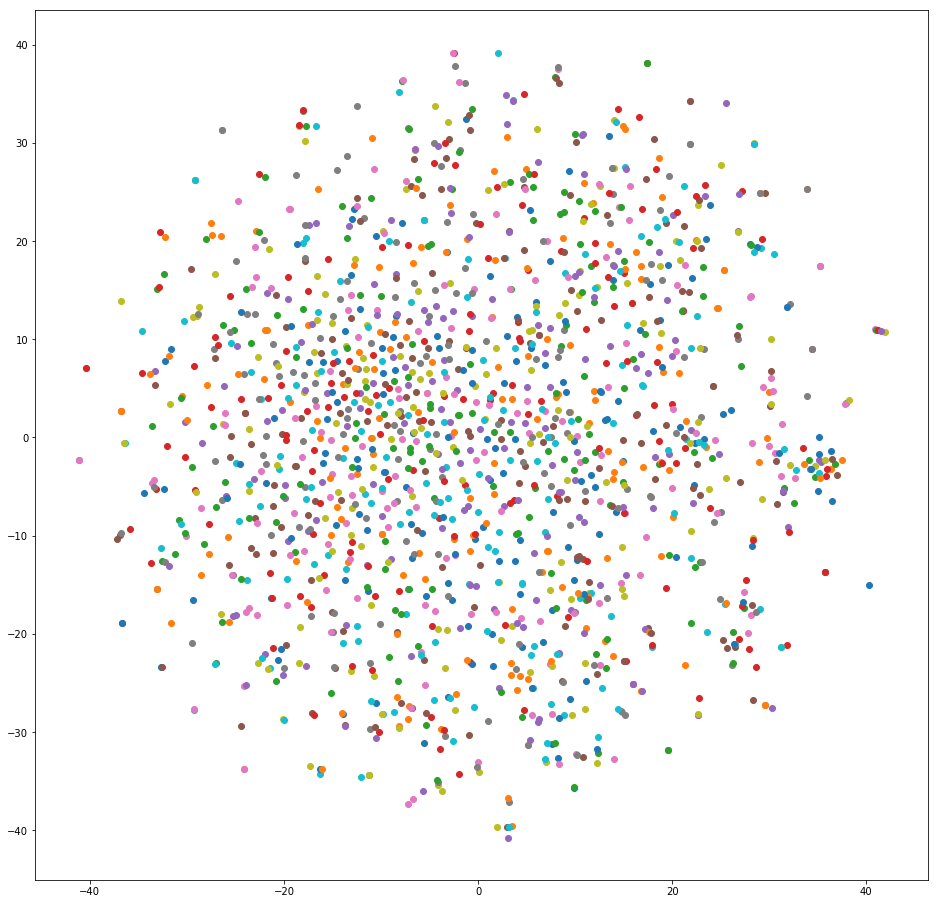

In [6]:
tsne_plot(model)